In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load dataset (built-in)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [15]:
# 2. Preprocess: Pad sequences
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)



In [16]:
# 3. Build model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/opt/venvs/jupyterhub/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
# 4. Train
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 203ms/step - accuracy: 0.7033 - loss: 0.5327 - val_accuracy: 0.8740 - val_loss: 0.3075
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9106 - loss: 0.2351 - val_accuracy: 0.8742 - val_loss: 0.3269
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.9318 - loss: 0.1830 - val_accuracy: 0.8694 - val_loss: 0.3485
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.9538 - loss: 0.1361 - val_accuracy: 0.8694 - val_loss: 0.3761
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.9569 - loss: 0.1153 - val_accuracy: 0.8664 - val_loss: 0.3757


In [18]:
# 5. Evaluate
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


  4/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9141 - loss: 0.2771

2025-07-29 10:45:28.397100: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20000000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8569 - loss: 0.3977
Test Accuracy: 0.8562


In [19]:
# 6. Predict
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()


782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step


In [20]:
# 7. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))



Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.86      0.86     12500
    Positive       0.86      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



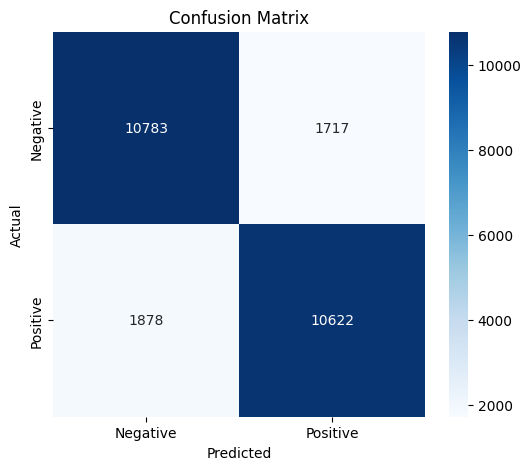

In [21]:
# 8. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

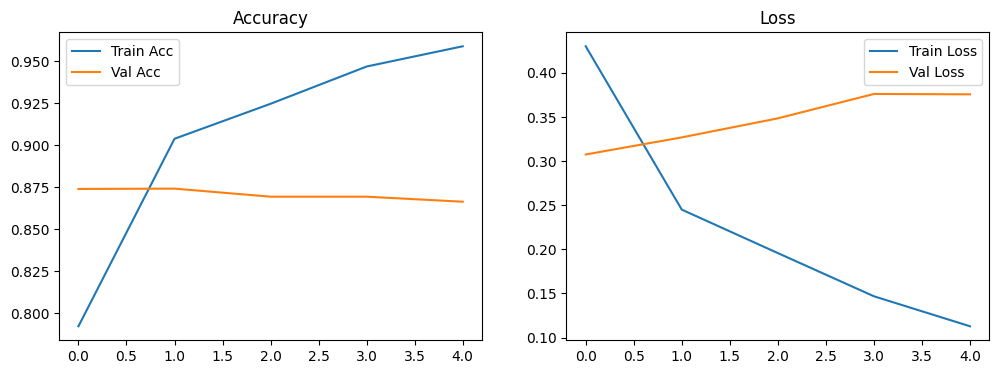

In [22]:
# 9. Accuracy and loss plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

In [23]:
# 10. Misclassified reviews (text reconstruction)
word_index = imdb.get_word_index()
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i, "?") for i in encoded_review])

# Show 5 misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0][:5]
for i in misclassified_indices:
    print(f"\nReview {i} (True: {y_test[i]}, Pred: {y_pred[i]}):")
    print(decode_review(x_test[i]))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Review 8 (True: 0, Pred: 1):
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> hollywood had a long love affair with bogus <UNK> nights tales but few of these products have stood the test of time the most memorable were the jon hall maria <UNK> films which have long since become camp this one is filled with dubbed songs <UNK> <UNK> and slapstick it's a truly crop of corn and pretty near <UNK> today it was nominated for its imaginative special effects which are almost <UNK> in this day and age <UNK> mainly of trick photography the only outstanding positive feature which survives is its beau